In [46]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*deprecated.*")

In [47]:
# URLs for training and test datasets
url_train = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv'
url_test = 'https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Bank%20Marketing/termdeposit_test.csv'

# Read the datasets into pandas DataFrames
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [3]:
# Checking the first 5 columns
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
# Checking the first 5 columns
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


The test dataset does not include information about subscriptions. Therefore, it cannot be used to evaluate the performance of the classifiers,
as the target variable 'subscribed' is not present in this dataset.

In [5]:
# Checking data type
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
# Checking data type
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [9]:
# Checking missing data
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
# Checking missing data
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

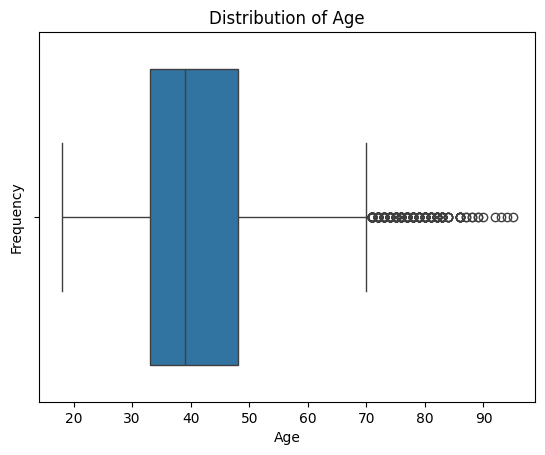

In [4]:
# Ploting box plot to understand the sub
sns.boxplot(x=df_train['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

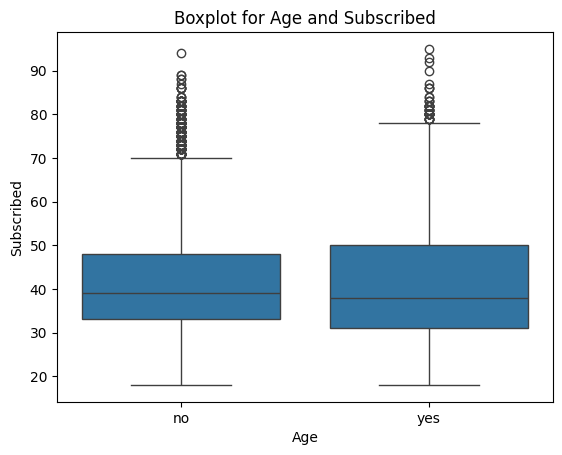

In [5]:
# Ploting box plot to understand the sub
sns.boxplot(x = 'subscribed', y = 'age' ,data = df_train )
plt.xlabel('Age')
plt.ylabel('Subscribed')
plt.title('Boxplot for Age and Subscribed')
plt.show()

In [41]:
len(y_test.sum())

13391

In [40]:
len(y_train.sum())

67009

In [51]:
np.random.seed(123)
# Step 1: Train a Model
# Split the df_train dataset into features (X_train) and the target variable (y_train)
X_train = df_train.drop(columns=['subscribed'])  # Features
y_train = df_train['subscribed']  # Target variable

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Set the random seed
np.random.seed(42)

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()

# Train and evaluate each classifier
classifiers = [random_forest, gradient_boosting, logistic_regression]

for clf in classifiers:
    # Train the classifier
    clf.fit(X_train_encoded, y_train)

    # For RandomForestClassifier, print feature importances
    if isinstance(clf, RandomForestClassifier):
        feature_importances = clf.feature_importances_
        feature_names = X_train_encoded.columns
        importance_dict = dict(zip(feature_names, feature_importances))
        print(f"RandomForestClassifier Feature Importances:\n{importance_dict}")

    # Step 2: Make Predictions on the Test Set
    # Preprocess the df_test dataset as needed
    X_test_encoded = pd.get_dummies(df_test)  # One-hot encode test set
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_encoded)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print("Predictions:", y_pred)
    print("="*50)

RandomForestClassifier Feature Importances:
{'ID': 0.18212708686671675, 'age': 0.06926969367134374, 'balance': 0.07452458032656241, 'day': 0.05832943787755717, 'duration': 0.24981924189948493, 'campaign': 0.03144513034365221, 'pdays': 0.030046775483182117, 'previous': 0.01737415607103019, 'job_admin.': 0.007688379412484335, 'job_blue-collar': 0.007358286699503966, 'job_entrepreneur': 0.0028538487001174696, 'job_housemaid': 0.002486815623687652, 'job_management': 0.008922425455943609, 'job_retired': 0.00447771658998305, 'job_self-employed': 0.003909446819829065, 'job_services': 0.005527039429012821, 'job_student': 0.003648967893489339, 'job_technician': 0.008984168720330634, 'job_unemployed': 0.0035288319663475173, 'job_unknown': 0.0012179357329859513, 'marital_divorced': 0.006272242912696453, 'marital_married': 0.009208070803112752, 'marital_single': 0.008164608546432814, 'education_primary': 0.006183183487090265, 'education_secondary': 0.009764746114941443, 'education_tertiary': 0.009